### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Directorio de imágenes

In [44]:
base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir, 'test')

### Escalamiento y Preprocesado

In [56]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Escalar a [0, 1]
    rotation_range=30,
    width_shift_range=0.2,         
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2], 
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(1./255)  # Escalar imágenes de validation a [0, 1]
test_datagen = ImageDataGenerator(1./255)  # Escalar imágenes de test a [0, 1]

In [57]:
# Definir tamaño de imágenes y tamaño de batches
train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size = (150, 150),
	batch_size = 9,  
	class_mode ='categorical', # 'categorical' para más de 2 clases a clasificar
	shuffle = True 
)

Found 2459 images belonging to 5 classes.


<Figure size 640x480 with 0 Axes>

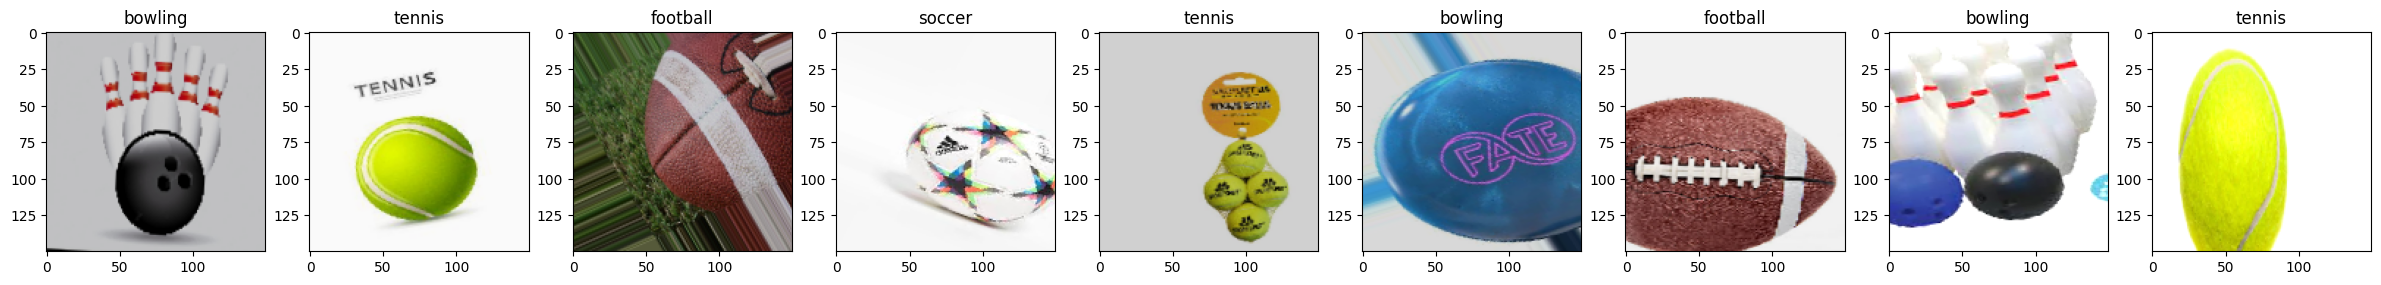

In [58]:
# Visualizar imágenes despúes de escalamiento y preprocesado
images, labels = train_generator[0]

class_names = list(train_generator.class_indices.keys()) # Obtener nombres de clases
label_indices = labels.argmax(axis=1)  # Convierte etiquetas a índices

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 5))

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(class_names[label_indices[i]], fontsize=12)